# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-11 06:00:25.695154


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/10/20


,10/10/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7717932,214370,2.78
Brazil,5055888,149639,2.96
India,7053806,108334,1.54
Mexico,814328,83642,10.27
United Kingdom,593565,42850,7.22
Italy,349494,36140,10.34
Peru,846088,33223,3.93


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/10/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
45496,US,7605873,2020-10-08,212762.0,961.0,56191.0,46868.857143
45495,US,7549682,2020-10-07,211801.0,915.0,50341.0,45234.285714
45494,US,7499341,2020-10-06,210886.0,705.0,41939.0,43957.714286
45493,US,7457402,2020-10-05,210181.0,460.0,39557.0,43980.714286
45492,US,7417845,2020-10-04,209721.0,337.0,35504.0,43088.571429
45491,US,7382341,2020-10-03,209384.0,687.0,50044.0,43219.714286
45490,US,7332297,2020-10-02,208697.0,907.0,54506.0,42480.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/10/20


,10/10/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,473143,33293.0,7.04
Texas,815915,16943.0,2.08
California,852410,16567.0,1.94
New Jersey,212877,16171.0,7.60
Florida,728921,15186.0,2.08
Massachusetts,138340,9587.0,6.93
Illinois,319451,9221.0,2.89


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/10/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1575,California,845270,2020-10-08,16418.0,80.0,3342.0,3295.000000
1574,California,841928,2020-10-07,16338.0,94.0,3726.0,3259.000000
1573,California,838202,2020-10-06,16244.0,73.0,2695.0,3221.142857
1572,California,835507,2020-10-05,16171.0,24.0,2794.0,3256.571429
1571,California,832713,2020-10-04,16147.0,32.0,3192.0,3260.428571
1570,California,829521,2020-10-03,16115.0,61.0,3508.0,3152.857143
1569,California,826013,2020-10-02,16054.0,81.0,3808.0,3193.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/10/20


,10/10/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,281165,6768.0,2.41
Orange,55531,1340.0,2.41
Riverside,61824,1256.0,2.03
San Bernardino,57834,986.0,1.70
San Diego,50143,825.0,1.65
San Joaquin,20828,473.0,2.27
Sacramento,23649,450.0,1.90


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/10/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4994,Los Angeles,278665,2020-10-08,6726.0,17.0,1220.0,1042.000000
4993,Los Angeles,277445,2020-10-07,6709.0,28.0,1589.0,1020.857143
4992,Los Angeles,275856,2020-10-06,6681.0,27.0,914.0,938.857143
4991,Los Angeles,274942,2020-10-05,6654.0,7.0,377.0,926.714286
4990,Los Angeles,274565,2020-10-04,6647.0,5.0,927.0,966.285714
4989,Los Angeles,273638,2020-10-03,6642.0,16.0,985.0,950.000000
4988,Los Angeles,272653,2020-10-02,6626.0,16.0,1282.0,982.571429
4987,Los Angeles,271371,2020-10-01,6610.0,34.0,1072.0,993.857143
4986,Los Angeles,270299,2020-09-30,6576.0,25.0,1015.0,995.142857
4985,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429



7 day new US cases as of 10/10/20


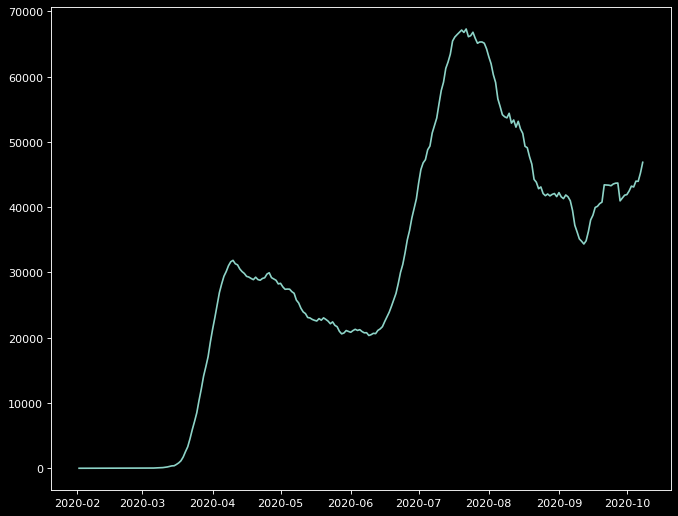

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/10/20


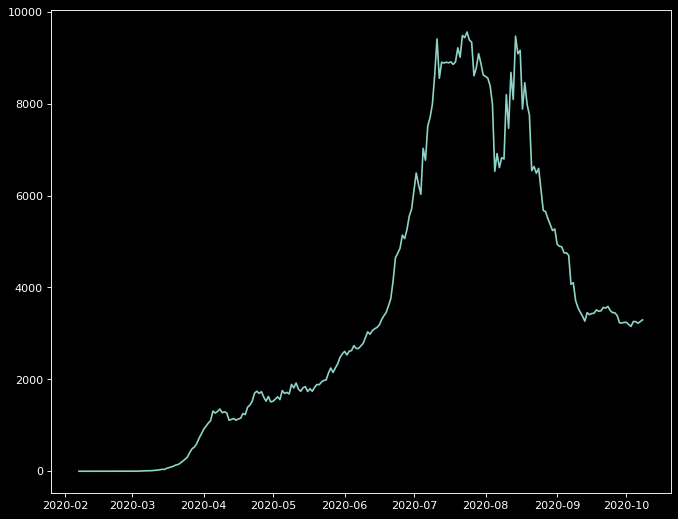

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/10/20


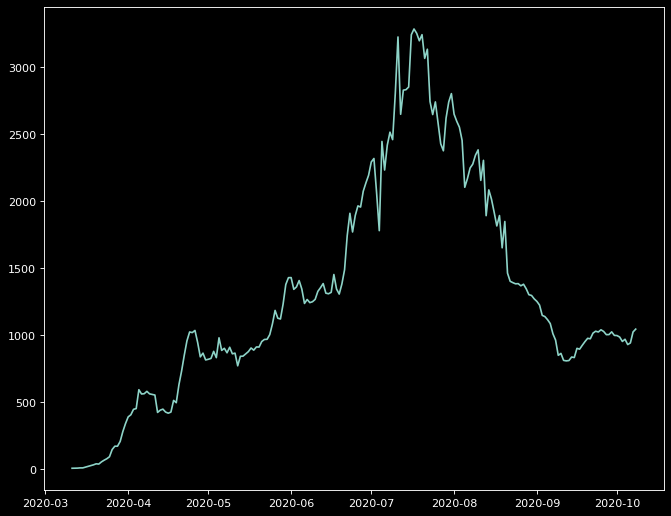

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()